In [108]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [55]:
df = pd.read_csv('medical.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [56]:
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2) > 25

In [57]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,True
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,False
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,True
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,True
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,True
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,True
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,True


In [147]:
df_cat = pd.melt(frame=df, value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'],id_vars=['cardio'])

In [148]:
df_cat

,cardio,variable,value
0,0,cholesterol,1
1,1,cholesterol,3
2,1,cholesterol,3
3,1,cholesterol,1
4,0,cholesterol,1
...,...,...,...
419995,0,overweight,True
419996,1,overweight,True
419997,1,overweight,True
419998,1,overweight,True


In [149]:
df_cat.loc[(df_cat['variable'] == 'cholesterol') & (df_cat['value'] == 1), 'value'] = 0
df_cat.loc[(df_cat['variable'] == 'cholesterol') & (df_cat['value'] > 1), 'value'] = 1
df_cat.loc[(df_cat['variable'] == 'gluc') & (df_cat['value'] == 1), 'value'] = 0
df_cat.loc[(df_cat['variable'] == 'gluc') & (df_cat['value'] > 1), 'value'] = 1

In [150]:
df_cat = pd.DataFrame(df_cat.groupby(['variable', 'value', 'cardio'])['value'].count()).rename(columns={'value': 'total'}).reset_index()

In [161]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

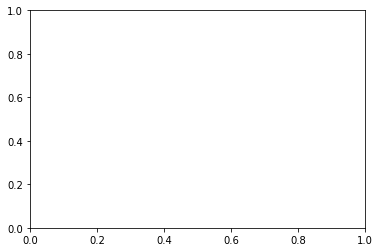

In [162]:
fig, ax = plt.subplots(1,1)

/Users/kysofi/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


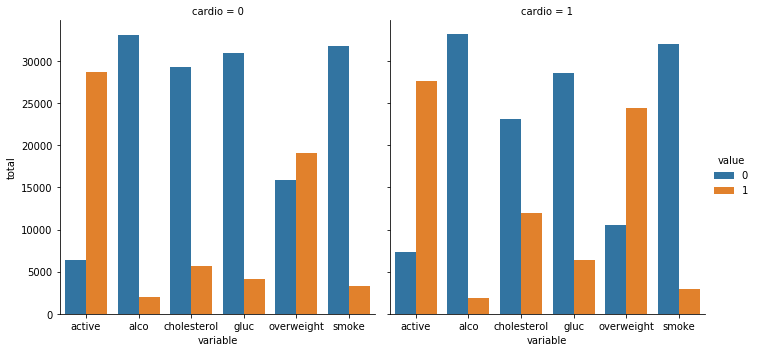

In [163]:
fig=sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar', ax=ax)

In [154]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
            (df['height'] >= df['height'].quantile(0.025)) &
            (df['height'] <= df['height'].quantile(0.975)) &
            (df['weight'] >= df['weight'].quantile(0.025)) & 
            (df['weight'] <= df['weight'].quantile(0.975))]

In [155]:
corr=df_heat.corr()

In [157]:
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

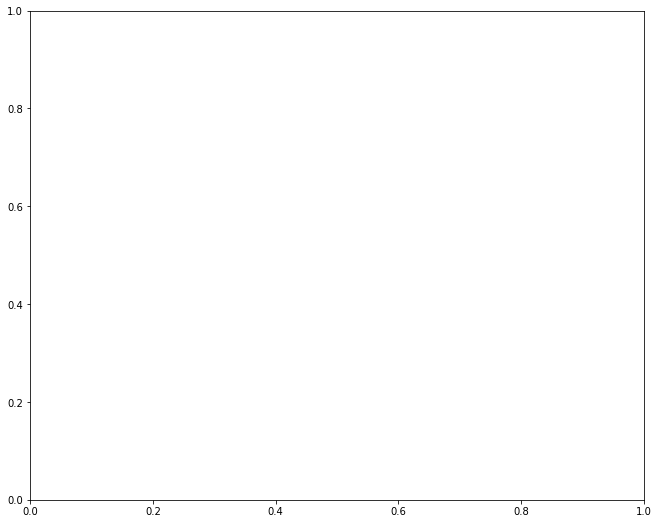

In [158]:
fig,ax = plt.subplots(figsize=(11,9))

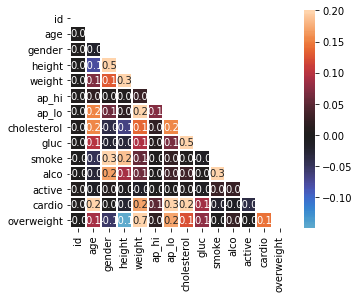

In [170]:
sns.heatmap(corr,annot=True, fmt='.1f', mask=mask,vmax=.2, center =0, square=True, linewidths=1)